## 1.Matplotlib基础


#### matplotlib是一个python2D的图形包，pyplot封装了很多画图的函数

In [2]:
import matplotlib.pyplot as plt
import numpy as np

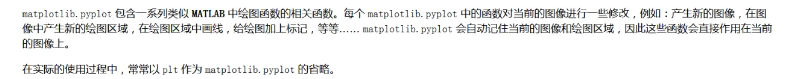

### plt.show()函数

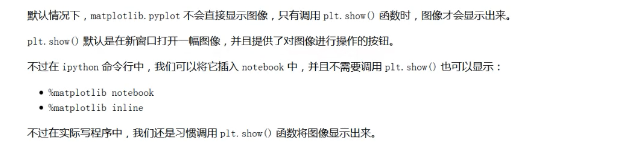

#### eg：plt.plot()函数可以用来描绘线形图

Text(0,0.5,'y')

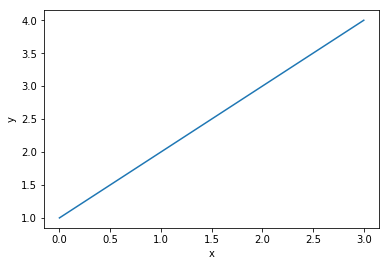

In [7]:
plt.plot([1,2,3,4])#默认的x值为[0,1,2,3]其实相当于索引index
plt.xlabel('x')
plt.ylabel('y') #输入中文的话会乱码

### 基本用法

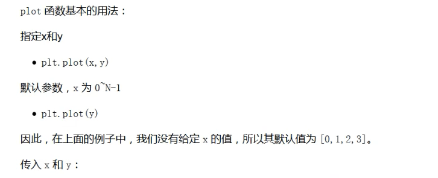

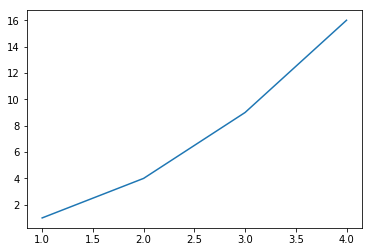

In [9]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

### 字符参数

#### 表示颜色

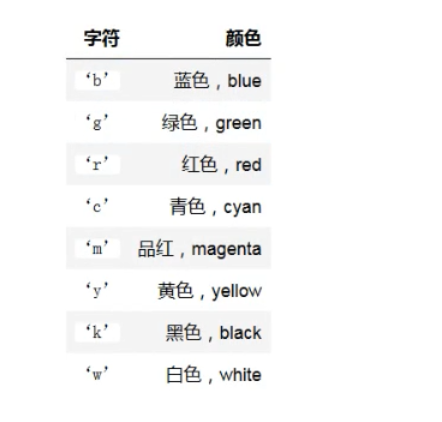

#### 线条类型

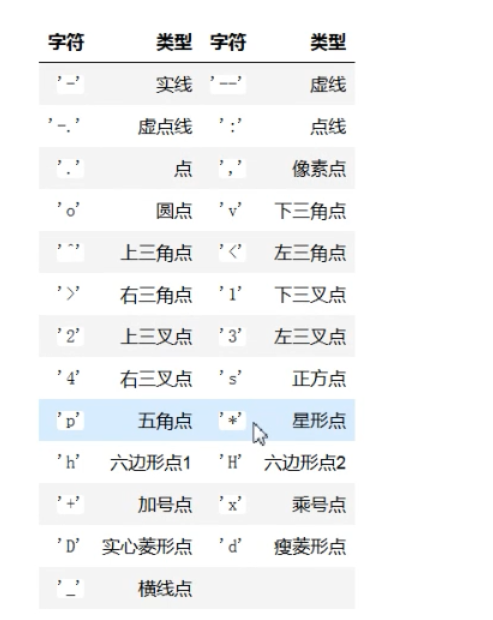

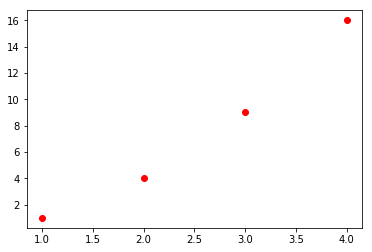

In [10]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.show()

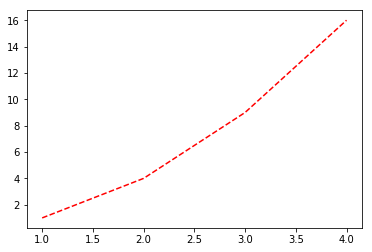

In [12]:
plt.plot([1,2,3,4],[1,4,9,16],'r--')
plt.show()

### 显示范围

#### 与matlab类似，这里可以用axis函数指定坐标轴显示的范围：
 plt.axis([xmin,xmax,ymin,ymax])

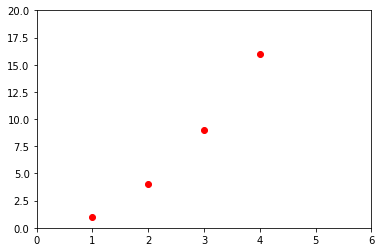

In [15]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20])
plt.show()

### 传入Numpy数组 

In [17]:
t=np.arange(0.,5.,0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

#### 在一个圈里画多条线

In [19]:
%matplotlib inline

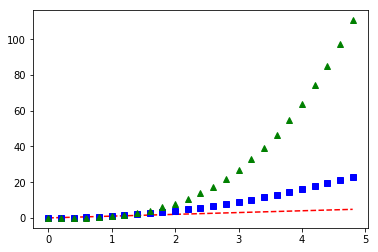

In [20]:
plt.plot(t,t,'r--',
        t,t**2,'bs',
        t,t**3,'g^')

#### 线条属性：可以用linewidth改变线条的宽度，color可以改变线条的颜色

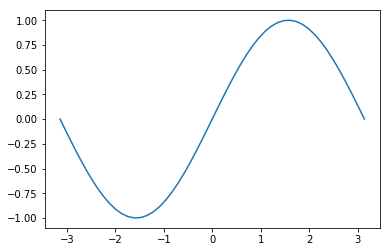

In [21]:
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
plt.plot(x,y)
plt.show()

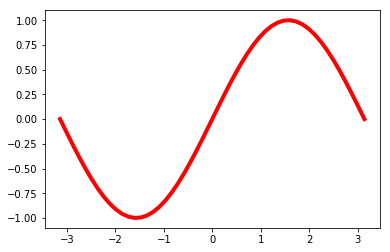

In [24]:
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
plt.plot(x,y,linewidth=4.0,color='r')
plt.show()

### 使用plt.plot()返回值来设置线条属性

plot函数返回的一个line2D对象组成的列表，每个对象代表输入的一对组合


line1，line2 = plt.plot(x1,y1,x2,y2) #line1,line2为两个2D对象，如果赋值为line就返回一个line1,line2组成的列表
lines = plt.plot(x1,y1,x2,y2)  #返回2个line2D对象组成的列表，注意不是对象，所以没用办法进行属性的调用

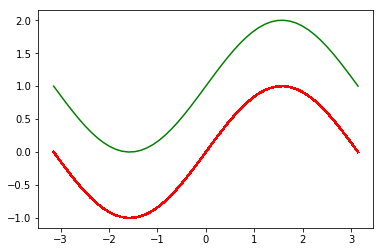

In [32]:
line1,line2=plt.plot(x,y,'r-',x,y+1,'g-')
line1.set_antialiased(False)
plt.show()

In [37]:
line1

#### plt.step()修改线条的性质

[None, None]

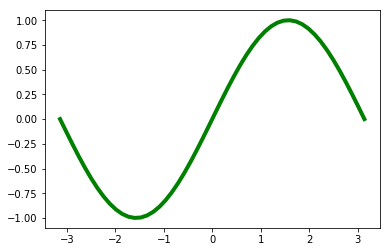

In [43]:
line = plt.plot(x,y)
plt.setp(line,color='g',linewidth=4)

In [45]:
plt.setp(line,'color','r','linewidth',4)

[None, None]

### 子图

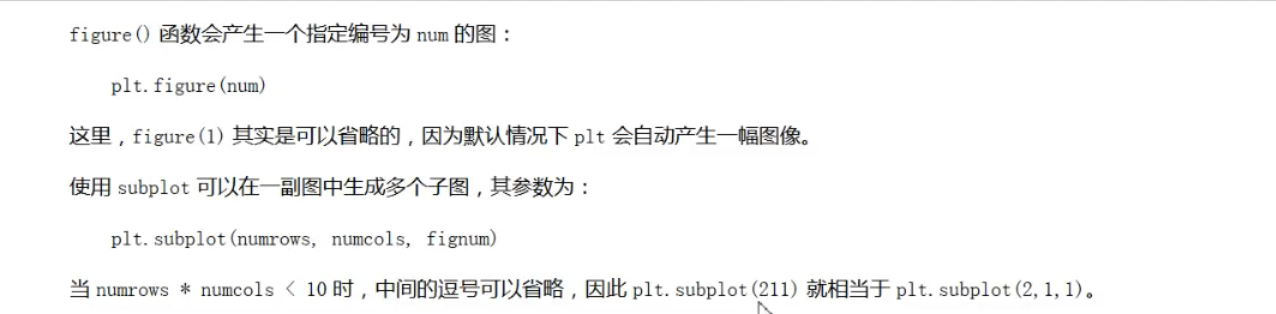

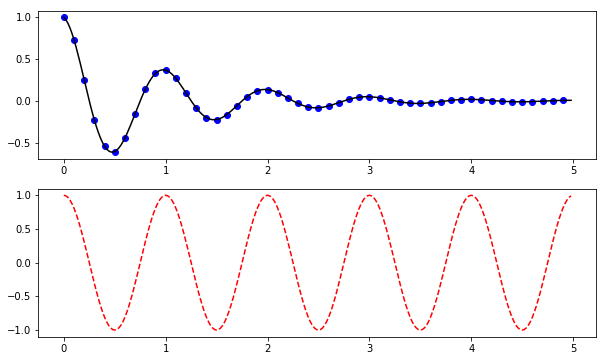

In [52]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)
t1=np.arange(0.0,5.0,0.1)
t2=np.arange(0.0,5.0,0.02)

plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')

plt.subplot(212)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')

## 电影可视化分析

In [55]:
#import ignore 
#warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
plt.rcParams['font.sans-serif']=['SimHei']#设置字体
plt.rcParams['axes.unicode_minus']=False #设置负号显示正常

In [64]:
df=pd.read_excel(r'D:\Documents\movie3_data.xlsx')

In [69]:
df=df.drop('Unnamed: 0',axis=1)

In [70]:
df[:5]

,产地,年代,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,美国,1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,美国,1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,意大利,1997,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,美国,1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,中国大陆,1993,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


### 绘制每个国家或者地区的柱状图

In [111]:
data=df['产地'].value_counts()

In [112]:
type(data)

pandas.core.series.Series

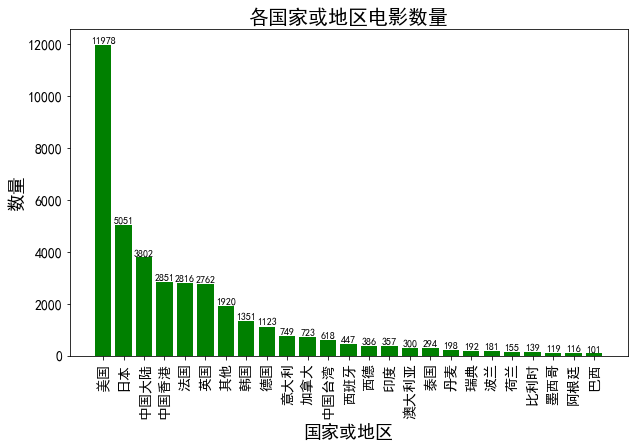

In [115]:
x=data.index
y=data.values
plt.figure(figsize=(10,6))
plt.bar(x,y,color='g')
plt.title('各国家或地区电影数量',fontsize=20)
plt.xlabel('国家或地区',fontsize=18)
plt.ylabel('数量',fontsize=18)
plt.tick_params(labelsize=14)#调整坐标轴大小
plt.xticks(rotation=90)#x轴旋转90
for a,b in zip(x,y):
    plt.text(a,b+10,b,ha='center',va='bottom',fontsize=10) #最其实a，b+10指的tag位置,考虑va=’top'
plt.show()


### 绘制每年上映电影的数量曲线图（1888-2015）

In [118]:
data1=df['年代'].value_counts()

In [119]:
data1=data1.sort_index()[:-1]


In [199]:
x=data1.index
y=data1.values
print(x,y,sep='\n')

Int64Index([1888, 1890, 1892, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=125)
[   2    1    1    3    8    8    3    2    2    7    4    6   16    8
    5    7    5    6    5    5    4    5    8   26   20   12   12   12
   20   14   22   22   18   28   25   23   29   40   35   25   42   37
   50   51   46   60   49   38   49   39   47   53   57   54   49   59
   75   87   89   76   79   87   88  102  115  147  107  122  128  131
  102  143  143  182  163  179  176  172  207  190  219  207  213  223
  196  233  220  201  227  224  274  266  277  294  321  324  343  391
  393  393  410  435  441  494  489  517  537  577  625  731  828  900
  951 1135 1263 1515 1711 1963 1862 1886 1866 2042 2001 1887 1592]


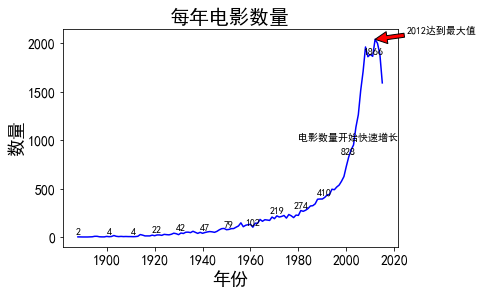

In [128]:
x=data1.index
y=data1.values
plt.title('每年电影数量',fontsize=20)
plt.xlabel('年份',fontsize=18)
plt.ylabel('数量',fontsize=18)
plt.tick_params(labelsize=14)#调整坐标轴大小
for a,b in zip(x[::10],y[::10]):
    plt.text(a,b+10,b,ha='center',va='bottom',fontsize=10)
plt.annotate('2012达到最大值',xy=(2012,data1[2012]),xytext=(2025,2100),arrowprops=dict(facecolor='red',edgecolor='black'))#xytext指文本的位置
plt.text(1980,1000,'电影数量开始快速增长')
plt.plot(x,y,'b')
plt.show()

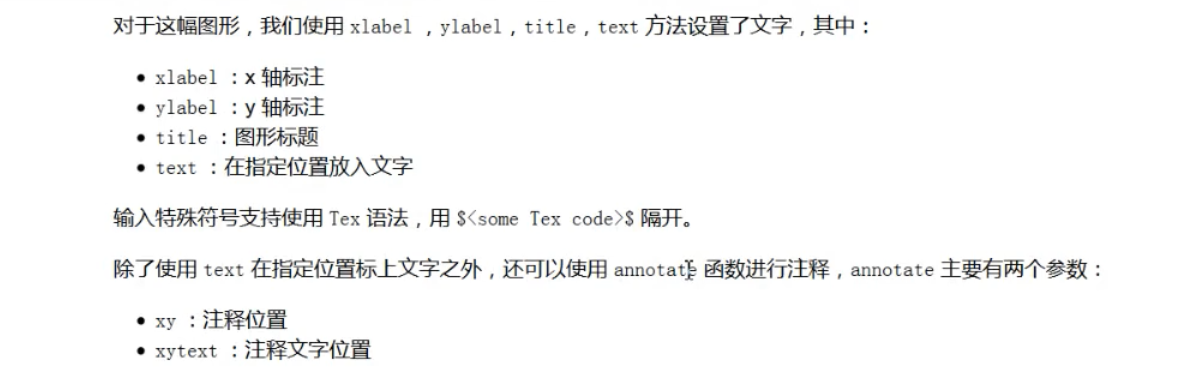


#### 根据电影长度绘制饼图

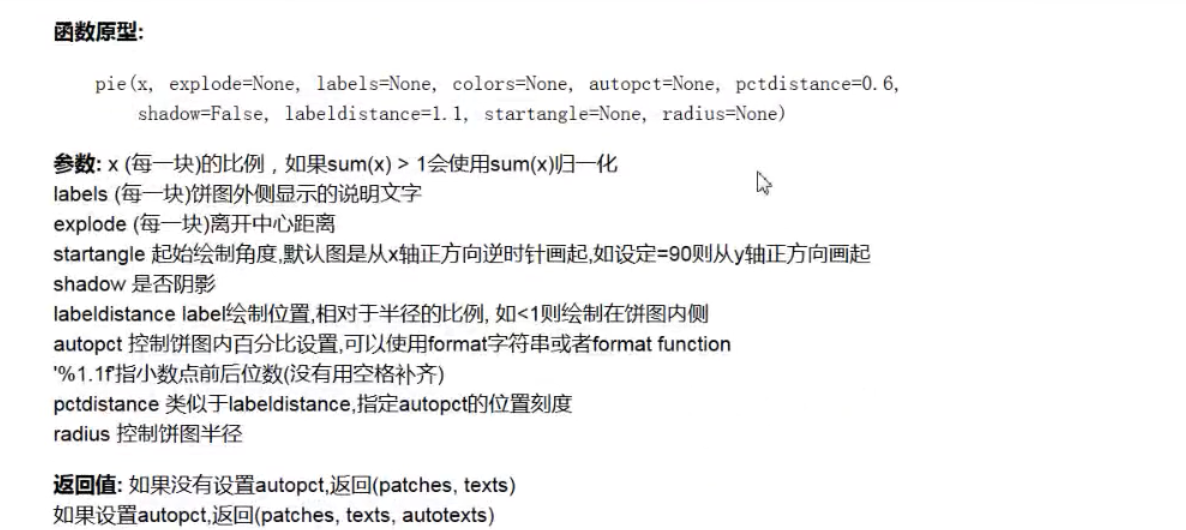

In [203]:
data3=pd.cut(df['时长'],[0,60,90,110,1000])


In [204]:
data3=data3.value_counts()
data3

(90, 110]      13232
(0, 60]        10321
(60, 90]        7727
(110, 1000]     7449
Name: 时长, dtype: int64

In [205]:
data3.index

CategoricalIndex([(90, 110], (0, 60], (60, 90], (110, 1000]], categories=[(0, 60], (60, 90], (90, 110], (110, 1000]], ordered=True, dtype='category')

[13232 10321  7727  7449]


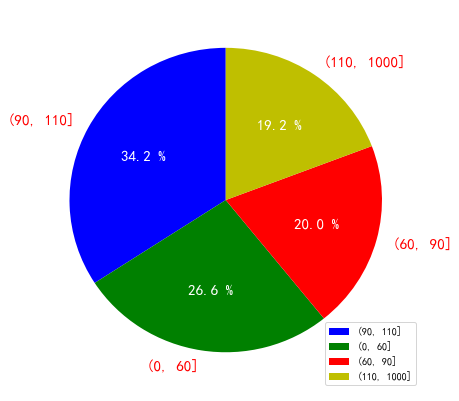

In [222]:
x=data3.values
print(x)
#y=y/sum(y)
labels=['(90,110)','2','3','4']
plt.figure(figsize=(7,7))
patches,l_text,p_text=plt.pie(x,labels=data3.index,autopct='%.1f %%',colors='bgry',startangle=90)
for i in p_text:
    i.set_color('w')
    i.set_size(15)
for i in l_text:
    i.set_color('r')
    i.set_size(15)
plt.legend()
plt.show()

### 根据电影评分绘制频率直方图

In [228]:
df['评分'].ndim

1

(array([  23.,  126.,  255.,  383.,  419.,  510.,  740.,  970., 1505.,
        2316., 3357., 4619., 4896., 5413., 5151., 3781., 2430., 1213.,
         512.,  110.]),
 array([2.   , 2.395, 2.79 , 3.185, 3.58 , 3.975, 4.37 , 4.765, 5.16 ,
        5.555, 5.95 , 6.345, 6.74 , 7.135, 7.53 , 7.925, 8.32 , 8.715,
        9.11 , 9.505, 9.9  ]),
 <a list of 20 Patch objects>)

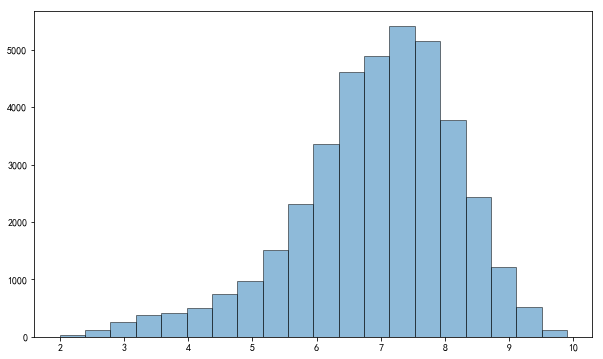

In [227]:
plt.figure(figsize=(10,6))
plt.hist(df['评分'],20,edgecolor='k',alpha=0.5)

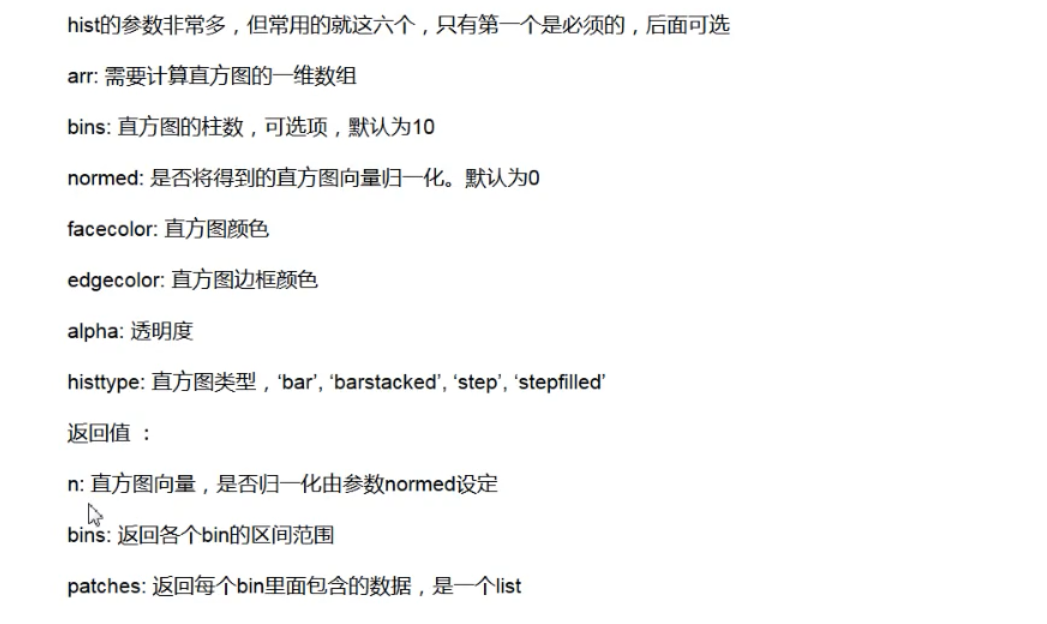